In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
data = pd.read_csv('/content/big_file.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Volume
0,2019-12-19 18:14:00,2.982,2.982,2.982,2.982,0.00
1,2019-12-19 18:15:00,2.982,2.982,2.982,2.982,0.00
2,2019-12-19 18:16:00,2.982,2.982,2.982,2.982,0.00
3,2019-12-19 18:17:00,2.982,2.982,2.982,2.982,0.00
4,2019-12-19 18:18:00,2.985,2.985,2.985,2.985,0.67
...,...,...,...,...,...,...
10075,2019-12-26 18:09:00,3.034,3.034,3.034,3.034,0.00
10076,2019-12-26 18:10:00,3.034,3.034,3.034,3.034,0.00
10077,2019-12-26 18:11:00,3.034,3.034,3.034,3.034,0.04
10078,2019-12-26 18:12:00,3.034,3.034,3.034,3.034,0.00


In [7]:
data_training = data[data['Date']<'2019-12-24 23:00:00'].copy()
data_training

,Date,Open,High,Low,Close,Volume
0,2019-12-19 18:14:00,2.982,2.982,2.982,2.982,0.000
1,2019-12-19 18:15:00,2.982,2.982,2.982,2.982,0.000
2,2019-12-19 18:16:00,2.982,2.982,2.982,2.982,0.000
3,2019-12-19 18:17:00,2.982,2.982,2.982,2.982,0.000
4,2019-12-19 18:18:00,2.985,2.985,2.985,2.985,0.670
...,...,...,...,...,...,...
7481,2019-12-24 22:55:00,3.034,3.034,3.034,3.034,0.000
7482,2019-12-24 22:56:00,3.033,3.033,3.033,3.033,0.244
7483,2019-12-24 22:57:00,3.034,3.034,3.034,3.034,0.095
7484,2019-12-24 22:58:00,3.034,3.034,3.034,3.034,0.000


In [8]:
data_test = data[data['Date']>='2019-12-24 23:00:00'].copy()
data_test

,Date,Open,High,Low,Close,Volume
7486,2019-12-24 23:00:00,3.035,3.036,3.035,3.036,3.585
7487,2019-12-24 23:01:00,3.036,3.036,3.036,3.036,0.000
7488,2019-12-24 23:02:00,3.036,3.036,3.036,3.036,0.000
7489,2019-12-24 23:03:00,3.036,3.036,3.036,3.036,0.000
7490,2019-12-24 23:04:00,3.036,3.036,3.036,3.036,0.000
...,...,...,...,...,...,...
10075,2019-12-26 18:09:00,3.034,3.034,3.034,3.034,0.000
10076,2019-12-26 18:10:00,3.034,3.034,3.034,3.034,0.000
10077,2019-12-26 18:11:00,3.034,3.034,3.034,3.034,0.040
10078,2019-12-26 18:12:00,3.034,3.034,3.034,3.034,0.000


In [24]:
training_data = data_training.drop(['Date'], axis = 1)
training_data.tail()

,Open,High,Low,Close,Volume
7481,3.034,3.034,3.034,3.034,0.000
7482,3.033,3.033,3.033,3.033,0.244
7483,3.034,3.034,3.034,3.034,0.095
7484,3.034,3.034,3.034,3.034,0.000
7485,3.034,3.034,3.034,3.034,49.925


In [10]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.89781022e-01, 1.89781022e-01, 2.01438849e-01, 1.89781022e-01,
        0.00000000e+00],
       [1.89781022e-01, 1.89781022e-01, 2.01438849e-01, 1.89781022e-01,
        0.00000000e+00],
       [1.89781022e-01, 1.89781022e-01, 2.01438849e-01, 1.89781022e-01,
        0.00000000e+00],
       ...,
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        2.87603386e-04],
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        0.00000000e+00],
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        1.51143148e-01]])

In [0]:
X_train = []
y_train = []

In [12]:
training_data.shape[0]

7486

In [28]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i, 0])

AttributeError: ignored

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train.shape, y_train.shape

((7426, 60, 5), (7426,))

In [0]:
#### Building LSTM

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
regressior.fit(X_train, y_train, epochs=1, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7426 samples
7426/7426 [==============================] - 87s 12ms/sample - loss: 0.0127


In [0]:
### Prepare Test Dataset

In [23]:
data_test.head()

,Date,Open,High,Low,Close,Volume
7486,2019-12-24 23:00:00,3.035,3.036,3.035,3.036,3.585
7487,2019-12-24 23:01:00,3.036,3.036,3.036,3.036,0.000
7488,2019-12-24 23:02:00,3.036,3.036,3.036,3.036,0.000
7489,2019-12-24 23:03:00,3.036,3.036,3.036,3.036,0.000
7490,2019-12-24 23:04:00,3.036,3.036,3.036,3.036,0.000


In [32]:
data_training.tail(60)

,Date,Open,High,Low,Close,Volume
7426,2019-12-24 22:00:00,3.019,3.019,3.019,3.019,0.000
7427,2019-12-24 22:01:00,3.019,3.019,3.019,3.019,0.000
7428,2019-12-24 22:02:00,3.019,3.019,3.019,3.019,0.000
7429,2019-12-24 22:03:00,3.019,3.019,3.019,3.019,0.000
7430,2019-12-24 22:04:00,3.019,3.019,3.019,3.019,0.000
7431,2019-12-24 22:05:00,3.019,3.019,3.019,3.019,0.000
7432,2019-12-24 22:06:00,3.019,3.019,3.019,3.019,0.000
7433,2019-12-24 22:07:00,3.019,3.019,3.019,3.019,0.369
7434,2019-12-24 22:08:00,3.019,3.019,3.019,3.019,0.000
7435,2019-12-24 22:09:00,3.019,3.019,3.019,3.019,0.000


In [0]:
past_60_minutes = data_training.tail(60)

In [35]:
df = past_60_minutes.append(data_test, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3.019,3.019,3.019,3.019,0.0
1,3.019,3.019,3.019,3.019,0.0
2,3.019,3.019,3.019,3.019,0.0
3,3.019,3.019,3.019,3.019,0.0
4,3.019,3.019,3.019,3.019,0.0


In [36]:
inputs = scaler.transform(df)
inputs

array([[4.59854015e-01, 4.59854015e-01, 4.67625899e-01, 4.59854015e-01,
        0.00000000e+00],
       [4.59854015e-01, 4.59854015e-01, 4.67625899e-01, 4.59854015e-01,
        0.00000000e+00],
       [4.59854015e-01, 4.59854015e-01, 4.67625899e-01, 4.59854015e-01,
        0.00000000e+00],
       ...,
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        1.21096162e-04],
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        0.00000000e+00],
       [5.69343066e-01, 5.69343066e-01, 5.75539568e-01, 5.69343066e-01,
        0.00000000e+00]])

In [0]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])

In [38]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((2594, 60, 5), (2594,))

In [0]:
y_pred = regressior.predict(X_test)

In [40]:
scaler.scale_

array([7.29927007e+00, 7.29927007e+00, 7.19424460e+00, 7.29927007e+00,
       3.02740406e-03])

In [41]:
scale = 1/7.29927007e+00
scale

0.13700000005617

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

In [0]:
s = 0
for x in y_pred:
    for y in y_test:
        s += abs(x - y)
y_avg = s / (y_pred.size * y_test.size)
y_avg

array([0.00310181])

In [0]:
### Visualization

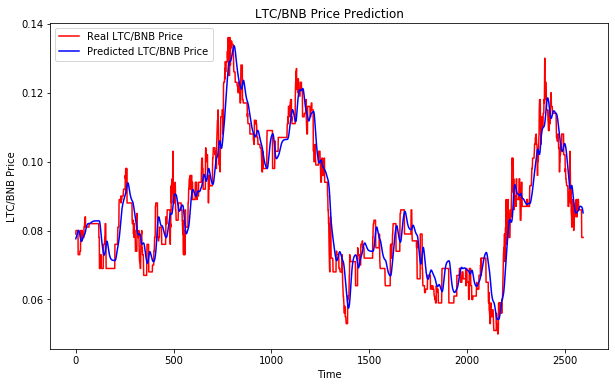

In [47]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color = 'red', label = 'Real LTC/BNB Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted LTC/BNB Price')
plt.title('LTC/BNB Price Prediction')
plt.xlabel('Time')
plt.ylabel('LTC/BNB Price')
plt.legend()
plt.show()